## Cloning Git Repo

In [ ]:
!git clone "https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments.git"

Cloning into 'TheSchoolOfAI-EVA5-Assignments'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 366 (delta 74), reused 42 (delta 13), pack-reused 209
Receiving objects: 100% (366/366), 9.04 MiB | 39.74 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
%cd "TheSchoolOfAI-EVA5-Assignments/Assignment 7/src"

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 7/src


## Loading CIFAR-10 Data 

In [ ]:
from data_loader import ImageDataLoader
from data_transform import CIFAR10Transforms

In [ ]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()
cifar10_transform = cifar10.build_transforms()

image_loader = ImageDataLoader(cifar10_transform, DATA_DIR, 128, True, 'CIFAR10')

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Taking a look at the data

#### Train data

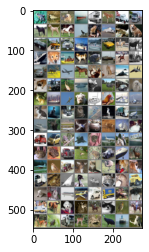

In [ ]:
image_loader.show(type='train')

#### Test Data

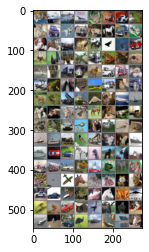

In [ ]:
image_loader.show(type='test')

## Defining the CNN Learner

Architecture : **(C1|M1|C2|M2|C3|M3|C4|GAP|O)**

Here we are loading our custom Dialated CNN model which has
* 3 Maxpool layers 
* 1 Dialated Convolution Layer
* 1 Depthwise Seperable Convolution Layer





In [ ]:
from cnn_models import CustomDilatedNet
from learner import Learner

In [ ]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=CustomDilatedNet())

### Model Summary

In [ ]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
              ReLU-6          [-1, 128, 32, 32]               0
       BatchNorm2d-7          [-1, 128, 32, 32]             256
           Dropout-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 128, 34, 34]          16,384
        MaxPool2d-10          [-1, 128, 17, 17]               0
           Conv2d-11          [-1, 128, 15, 15]         147,456
             ReLU-12          [-1, 128, 15, 15]               0
      BatchNorm2d-13          [-1, 128, 15, 15]             256
          Dropout-14          [-1, 128,

## Training

In [ ]:
cnn_learner.fit(epochs=10, lr=0.01, step_size=4)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1073191165924072 Batch_id=390 Accuracy=49.40: 100%|██████████| 391/391 [00:21<00:00, 18.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0175, Accuracy: 6388/10000 (63.88%)

EPOCH: 1


Loss=0.5492352247238159 Batch_id=390 Accuracy=70.58: 100%|██████████| 391/391 [00:21<00:00, 18.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7975, Accuracy: 7211/10000 (72.11%)

EPOCH: 2


Loss=0.44798365235328674 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6599, Accuracy: 7771/10000 (77.71%)

EPOCH: 3


Loss=0.7099410891532898 Batch_id=390 Accuracy=82.73: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6641, Accuracy: 7779/10000 (77.79%)

EPOCH: 4


Loss=0.3058803677558899 Batch_id=390 Accuracy=90.26: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 8343/10000 (83.43%)

EPOCH: 5


Loss=0.19843891263008118 Batch_id=390 Accuracy=92.63: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4972, Accuracy: 8371/10000 (83.71%)

EPOCH: 6


Loss=0.20945914089679718 Batch_id=390 Accuracy=94.13: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5110, Accuracy: 8343/10000 (83.43%)

EPOCH: 7


Loss=0.10187854617834091 Batch_id=390 Accuracy=95.53: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5235, Accuracy: 8315/10000 (83.15%)

EPOCH: 8


Loss=0.1144033670425415 Batch_id=390 Accuracy=96.89: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5200, Accuracy: 8361/10000 (83.61%)

EPOCH: 9


Loss=0.1464642435312271 Batch_id=390 Accuracy=97.05: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]



Test set: Average loss: 0.5213, Accuracy: 8357/10000 (83.57%)



#### Plot Losses and Accuracy(Train and Test)

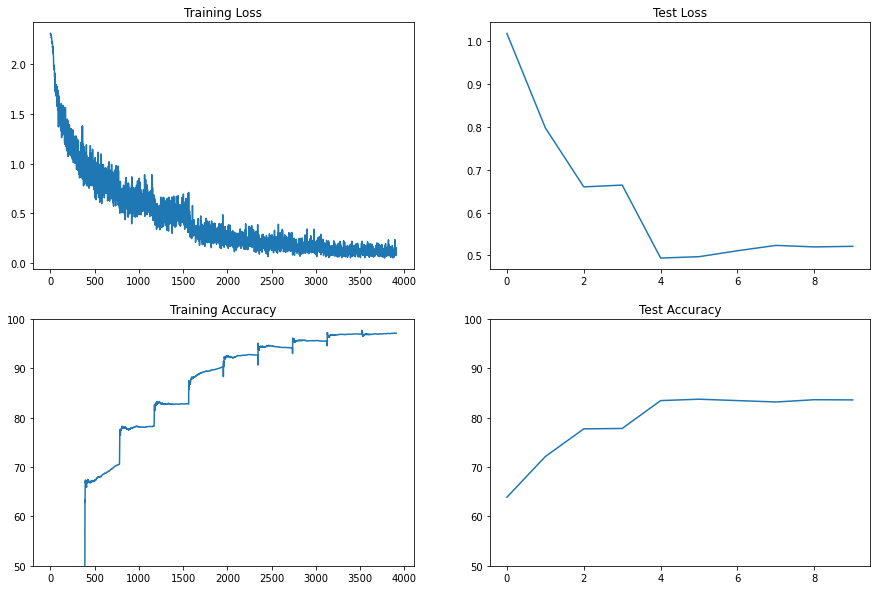

In [ ]:
cnn_learner.plot_losses()

## Interpreting the Learner on Test Data

In [ ]:
from interpreter import Interpreter

In [ ]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 7/src/interpreter.py:38: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = ((predicted == labels) == False).nonzero()


#### Confusion Matrix

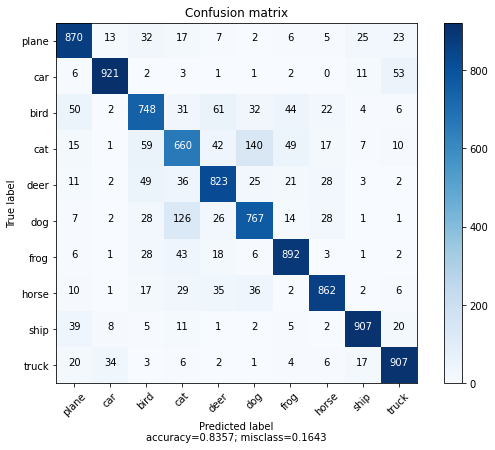

In [ ]:
intrepret.plot_confusion_matrix()

#### Performance Metrics
Here we see the Precision, Recall, F1-Score

In [ ]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.770340,0.7480,0.759006,1000.0000
car,0.935025,0.9210,0.927960,1000.0000
bird,0.686071,0.6600,0.672783,1000.0000
cat,0.810039,0.8230,0.816468,1000.0000
deer,0.757905,0.7670,0.762425,1000.0000
dog,0.858518,0.8920,0.874939,1000.0000
frog,0.885920,0.8620,0.873796,1000.0000
horse,0.841393,0.8700,0.855457,1000.0000
ship,0.927403,0.9070,0.917088,1000.0000
truck,0.880583,0.9070,0.893596,1000.0000


#### Misclassifications
Visualizing 50 Misclassifications


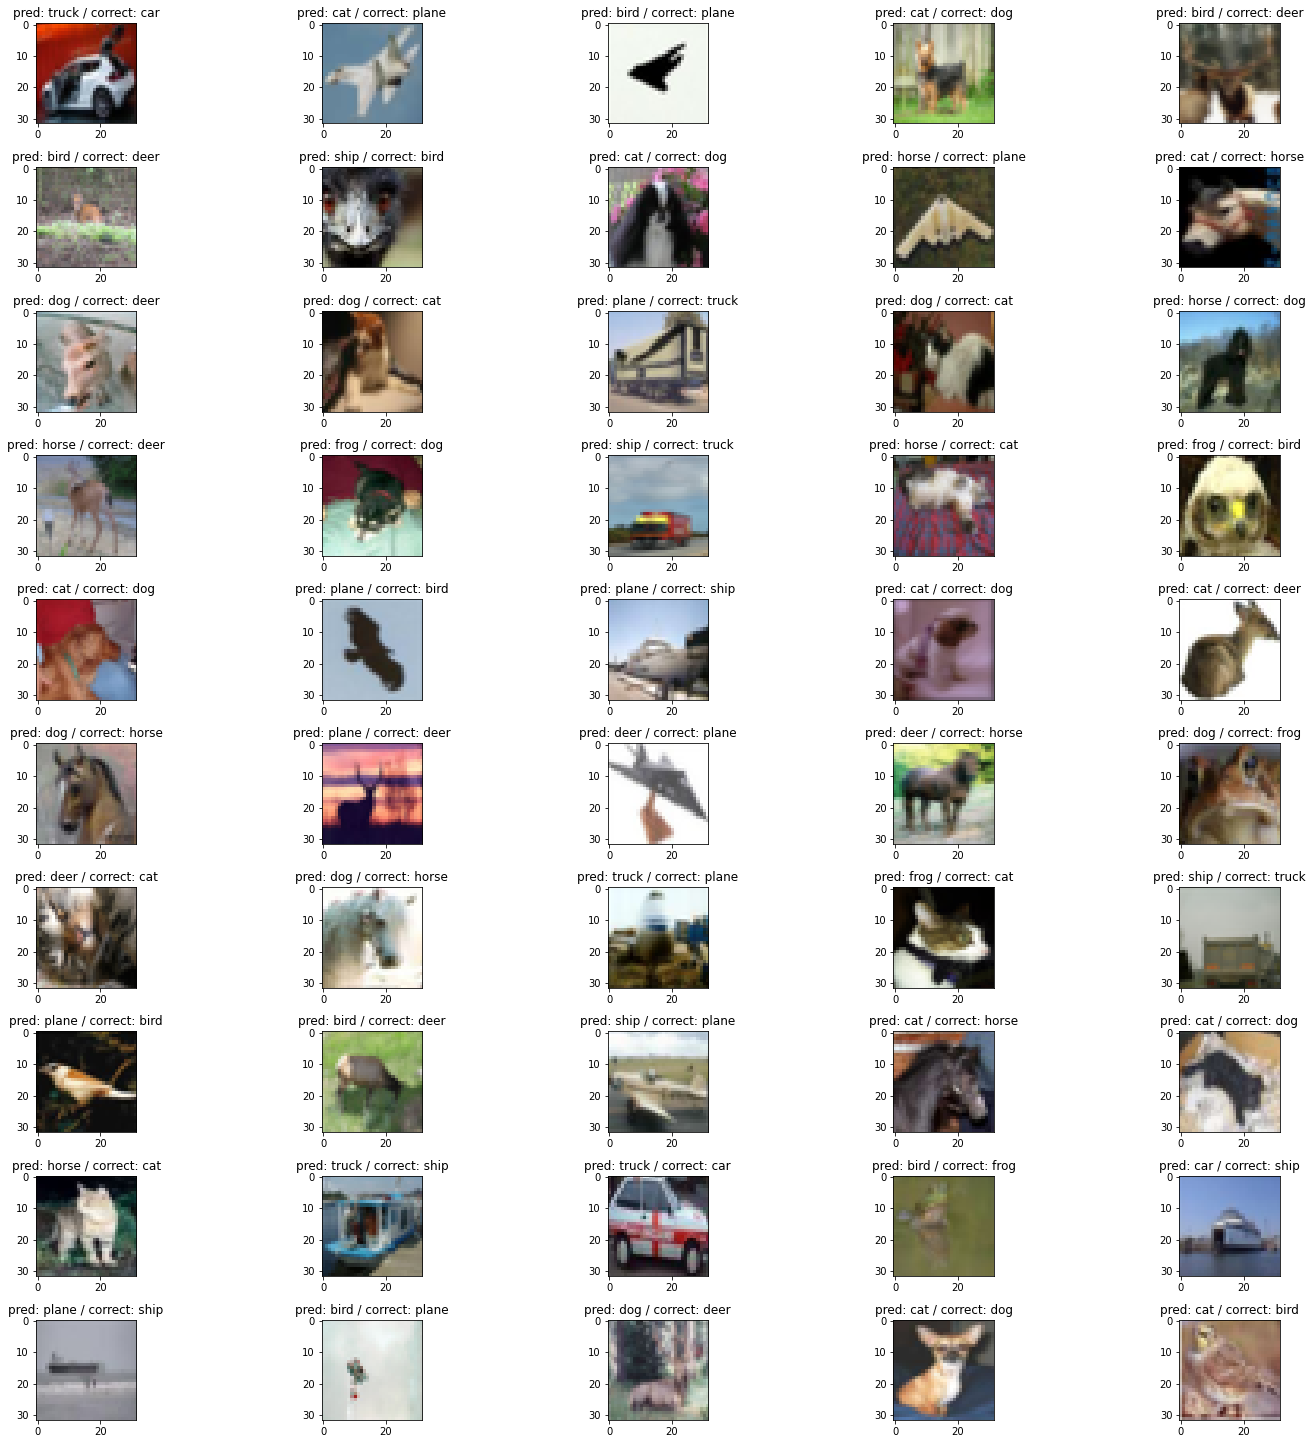

In [ ]:
intrepret.show_misclassifications(k=50)